<a href="https://colab.research.google.com/github/kenclements/praxis/blob/main/adaboost-twos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#!nvidia-smi

In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

In [35]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

import re

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import pandas as pd

from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [3]:
file = pd.read_csv('/Data/TWOS-dataset/email_ano/User1.csv')
file1 = pd.read_csv('/Data/TWOS-dataset/email_ano/User2.csv')
file2 = pd.read_csv('/Data/TWOS-dataset/email_ano/User3.csv')

In [5]:
df = pd.concat([file, file1, file2])

In [6]:
df

,id,label,body_anon,liwc_WC,liwc_Analytic,liwc_Clout,liwc_Authentic,liwc_Tone,liwc_WPS,liwc_Sixltr,...,liwc_Comma,liwc_Colon,liwc_SemiC,liwc_QMark,liwc_Exclam,liwc_Dash,liwc_Quote,liwc_Apostro,liwc_Parenth,liwc_OtherP
0,758,NORMAL,Hey Yeah I think we could do that. I did a tes...,43,48.77,91.85,87.51,25.77,8.60,13.95,...,2.33,0.00,0.0,4.65,2.33,0.00,0.0,4.65,0.00,0.00
1,1643,NORMAL,Hey guys How should we go about with BVH1B5K4F...,27,74.89,99.00,1.22,1.00,9.00,11.11,...,3.70,0.00,0.0,3.70,0.00,0.00,0.0,7.41,0.00,0.00
2,1662,NORMAL,Yeah I think we should: 71J871LWL3) Backup UAH...,42,22.77,82.96,6.50,3.31,14.00,14.29,...,0.00,2.38,0.0,2.38,0.00,0.00,0.0,0.00,7.14,0.00
3,1675,NORMAL,Okay so as protection we will just clear all i...,71,10.55,96.62,5.25,52.17,23.67,16.90,...,1.41,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00
4,1689,NORMAL,Can M5P10WM4K7 the whole desktop with excel fi...,38,12.16,96.70,50.35,97.58,9.50,7.89,...,0.00,0.00,0.0,2.63,0.00,0.00,0.0,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42,31804,ANOMALY,Can you all see me? LJT7IBU5BN User9 you were ...,96,54.96,89.42,74.76,65.25,8.73,17.71,...,9.38,7.29,0.0,1.04,0.00,1.04,0.0,1.04,2.08,3.12
43,25296,ANOMALY,Hi guys I'm back! Had some trouble logging in ...,26,53.63,93.79,63.54,1.00,6.50,15.38,...,0.00,0.00,0.0,3.85,3.85,0.00,0.0,3.85,0.00,0.00
44,29578,ANOMALY,I meant if we know which customer has been con...,31,9.68,25.93,99.00,83.22,7.75,22.58,...,0.00,0.00,0.0,0.00,0.00,0.00,0.0,3.23,0.00,3.23
45,23144,ANOMALY,Roger that.thank you. Was trying my luck. At l...,24,3.55,4.80,98.01,99.00,6.00,0.00,...,4.17,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283 entries, 0 to 46
Data columns (total 96 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 283 non-null    int64  
 1   label              283 non-null    object 
 2   body_anon          283 non-null    object 
 3   liwc_WC            283 non-null    int64  
 4   liwc_Analytic      283 non-null    float64
 5   liwc_Clout         283 non-null    float64
 6   liwc_Authentic     283 non-null    float64
 7   liwc_Tone          283 non-null    float64
 8   liwc_WPS           283 non-null    float64
 9   liwc_Sixltr        283 non-null    float64
 10  liwc_Dic           283 non-null    float64
 11  liwc_function      283 non-null    float64
 12  liwc_pronoun       283 non-null    float64
 13  liwc_ppron         283 non-null    float64
 14  liwc_i             283 non-null    float64
 15  liwc_we            283 non-null    float64
 16  liwc_you           283 non-

In [8]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 96 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 160 non-null    int64  
 1   label              160 non-null    object 
 2   body_anon          160 non-null    object 
 3   liwc_WC            160 non-null    int64  
 4   liwc_Analytic      160 non-null    float64
 5   liwc_Clout         160 non-null    float64
 6   liwc_Authentic     160 non-null    float64
 7   liwc_Tone          160 non-null    float64
 8   liwc_WPS           160 non-null    float64
 9   liwc_Sixltr        160 non-null    float64
 10  liwc_Dic           160 non-null    float64
 11  liwc_function      160 non-null    float64
 12  liwc_pronoun       160 non-null    float64
 13  liwc_ppron         160 non-null    float64
 14  liwc_i             160 non-null    float64
 15  liwc_we            160 non-null    float64
 16  liwc_you           160 non

In [9]:
file.describe()

,id,liwc_WC,liwc_Analytic,liwc_Clout,liwc_Authentic,liwc_Tone,liwc_WPS,liwc_Sixltr,liwc_Dic,liwc_function,...,liwc_Comma,liwc_Colon,liwc_SemiC,liwc_QMark,liwc_Exclam,liwc_Dash,liwc_Quote,liwc_Apostro,liwc_Parenth,liwc_OtherP
count,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,...,160.000000,160.000000,160.0,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,18305.087500,50.756250,48.499875,69.902938,46.791312,56.645250,11.000875,12.628125,82.932437,50.537625,...,3.977188,0.818000,0.0,1.309625,1.369687,0.547562,0.179938,1.766437,0.807687,1.517812
std,10521.912617,32.270232,29.630498,28.456623,32.859995,36.679401,5.230732,6.227047,8.402098,7.934238,...,3.300604,2.552322,0.0,1.941616,3.301329,2.254651,0.943054,2.353989,2.203867,3.480021
min,656.000000,21.000000,1.000000,1.000000,1.000000,1.000000,4.670000,0.000000,40.620000,21.880000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12905.250000,31.000000,22.725000,50.000000,15.120000,25.770000,7.740000,8.000000,79.515000,45.645000,...,1.155000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14528.500000,40.000000,49.705000,80.465000,44.045000,65.250000,9.635000,11.760000,84.670000,51.720000,...,3.775000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.640000,0.000000,0.000000
75%,26286.750000,57.500000,73.187500,93.862500,74.760000,95.810000,12.270000,16.172500,88.272500,56.120000,...,6.075000,0.000000,0.0,2.640000,2.182500,0.000000,0.000000,2.985000,0.000000,1.475000
max,36854.000000,251.000000,98.460000,99.000000,99.000000,99.000000,35.000000,40.000000,95.920000,67.390000,...,14.290000,15.620000,0.0,9.680000,30.430000,21.430000,8.960000,13.640000,16.220000,26.190000


In [10]:
file.index

RangeIndex(start=0, stop=160, step=1)

In [11]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 96 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 160 non-null    int64  
 1   label              160 non-null    object 
 2   body_anon          160 non-null    object 
 3   liwc_WC            160 non-null    int64  
 4   liwc_Analytic      160 non-null    float64
 5   liwc_Clout         160 non-null    float64
 6   liwc_Authentic     160 non-null    float64
 7   liwc_Tone          160 non-null    float64
 8   liwc_WPS           160 non-null    float64
 9   liwc_Sixltr        160 non-null    float64
 10  liwc_Dic           160 non-null    float64
 11  liwc_function      160 non-null    float64
 12  liwc_pronoun       160 non-null    float64
 13  liwc_ppron         160 non-null    float64
 14  liwc_i             160 non-null    float64
 15  liwc_we            160 non-null    float64
 16  liwc_you           160 non

In [12]:
file['body_anon'] = file['body_anon'].astype(str)

In [13]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer


In [14]:
file['body_anon']

0      Hey Yeah I think we could do that. I did a tes...
1      Hey guys How should we go about with BVH1B5K4F...
2      Yeah I think we should: 71J871LWL3) Backup UAH...
3      Okay so as protection we will just clear all i...
4      Can M5P10WM4K7 the whole desktop with excel fi...
                             ...                        
155    I think it is a good idea if you guys can orga...
156    Hey guys So please ensure that all your accoun...
157    Tue =WG4V688FUG V1AGEWA8CT Wed =WG4V688FUG OAP...
158    Hey friends I found a new trick also will shar...
159    I was thinking of not taking all of their data...
Name: body_anon, Length: 160, dtype: object

In [15]:
def prep(dfx):
    dfx1 = [re.sub(r'[^\w\s]','', x) for x in dfx]
    dfx1 = ''.join(dfx1)
    return(dfx1)

df1 = file['body_anon'].apply(prep)

In [16]:
df1

0      Hey Yeah I think we could do that I did a test...
1      Hey guys How should we go about with BVH1B5K4F...
2      Yeah I think we should 71J871LWL3 Backup UAHQJ...
3      Okay so as protection we will just clear all i...
4      Can M5P10WM4K7 the whole desktop with excel fi...
                             ...                        
155    I think it is a good idea if you guys can orga...
156    Hey guys So please ensure that all your accoun...
157    Tue WG4V688FUG V1AGEWA8CT Wed WG4V688FUG OAPHS...
158    Hey friends I found a new trick also will shar...
159    I was thinking of not taking all of their data...
Name: body_anon, Length: 160, dtype: object

In [17]:
stops = set(stopwords.words('english'))
print(stops)

{'at', 'needn', 'them', 'because', 'it', 'he', 'once', 'where', 'not', 'before', "you'll", "shan't", 'who', 'again', 'him', 'his', 'while', 'through', 'isn', 'yourselves', 'll', 'o', 'if', 'is', "haven't", 'have', "hadn't", 'am', 've', 'with', 'of', 'no', "it's", 'to', 'so', 'into', 'own', 'haven', 'other', 'down', 'against', 'had', 'then', 'which', 'such', 'didn', 'they', 'yourself', 'ours', 'under', 'there', 'your', 'how', "wasn't", 'too', 'in', 'just', 'couldn', 'very', 'ourselves', 'weren', 'that', 'below', 'during', "mightn't", 'on', 'my', 'm', 'an', "weren't", 'me', 'hadn', 'from', 'herself', 'will', "that'll", 'can', 'we', 'being', "she's", 'were', 'themselves', 'for', 'and', 'both', 'only', 's', 'theirs', 'has', 'should', 'mustn', "needn't", 'our', 'further', 'as', 'y', 'yours', 'ain', 'don', 'than', 'a', 'by', "isn't", 'between', 'itself', 'i', 'above', 'the', 'here', 'few', 'her', 'about', "doesn't", "shouldn't", 'hasn', "wouldn't", "you've", "don't", 'until', 'been', 'mightn

In [18]:
def prepare_text(pretext):

    # tokenize mission.
    tokens = word_tokenize(pretext, language="english", preserve_line=True)

    # Parts of speech (POS) tag tokens.
    token_tag = pos_tag(tokens)
    
    # Only include some of the POS tags.
    include_tags = ['VBN', 'VBD', 'JJ', 'JJS', 'JJR', 'CD', 'NN', 'NNS', 'NNP', 'NNPS']
    filtered_tokens = (tok for tok, tag in token_tag if tag in include_tags)
    
    #stem words.
    stemmed_tokens = (lancaster.stem(tok) for tok in filtered_tokens)

    #lemm words.
    lemmed_words = (lemmatizer.lemmatize(tok) for tok in stemmed_tokens)

    lower_words = [str.lower(tok) for tok in lemmed_words]

    #x = cv.fit_transform(tokens).toarray()

    return(lower_words)

    #ps = PorterStemmer()
lancaster = LancasterStemmer()
lemmatizer = nltk.stem.WordNetLemmatizer()
    
file['tokenized'] = file['body_anon'].apply(prepare_text)


In [19]:
file


,id,label,body_anon,liwc_WC,liwc_Analytic,liwc_Clout,liwc_Authentic,liwc_Tone,liwc_WPS,liwc_Sixltr,...,liwc_Colon,liwc_SemiC,liwc_QMark,liwc_Exclam,liwc_Dash,liwc_Quote,liwc_Apostro,liwc_Parenth,liwc_OtherP,tokenized
0,758,NORMAL,Hey Yeah I think we could do that. I did a tes...,43,48.77,91.85,87.51,25.77,8.60,13.95,...,0.00,0.0,4.65,2.33,0.0,0.0,4.65,0.00,0.00,"[hey, did, test, first, custom, first, 4gaa3hg..."
1,1643,NORMAL,Hey guys How should we go about with BVH1B5K4F...,27,74.89,99.00,1.22,1.00,9.00,11.11,...,0.00,0.0,3.70,0.00,0.0,0.0,7.41,0.00,0.00,"[hey, guy, how, bvh1b5k4f4, let, plan, attack,..."
2,1662,NORMAL,Yeah I think we should: 71J871LWL3) Backup UAH...,42,22.77,82.96,6.50,3.31,14.00,14.29,...,2.38,0.0,2.38,0.00,0.0,0.0,0.00,7.14,0.00,"[71j871lwl3, backup, uahqj3gkvd, password, she..."
3,1675,NORMAL,Okay so as protection we will just clear all i...,71,10.55,96.62,5.25,52.17,23.67,16.90,...,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,"[okay, protect, inform, password, sheets., own..."
4,1689,NORMAL,Can M5P10WM4K7 the whole desktop with excel fi...,38,12.16,96.70,50.35,97.58,9.50,7.89,...,0.00,0.0,2.63,0.00,0.0,0.0,0.00,0.00,0.00,"[whol, desktop, excel, files., log, sur, track..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,23343,ANOMALY,I think it is a good idea if you guys can orga...,69,46.46,87.68,27.39,78.80,8.62,15.94,...,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,"[good, ide, meet, sess, contest., fac, team, o..."
156,29303,ANOMALY,Hey guys So please ensure that all your accoun...,46,46.46,93.58,16.76,66.89,7.67,10.87,...,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,"[hey, guy, so, plea, account, cle, first, plac..."
157,31138,ANOMALY,Tue =WG4V688FUG V1AGEWA8CT Wed =WG4V688FUG OAP...,47,65.57,33.52,96.52,25.77,11.75,10.64,...,0.00,0.0,2.13,0.00,0.0,0.0,2.13,0.00,6.38,"[tue, =wg4v688fug, v1agewa8ct, wed, =wg4v688fu..."
158,23489,ANOMALY,Hey friends I found a new trick also will shar...,31,92.84,90.14,96.96,83.22,10.33,6.45,...,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,"[hey, friend, found, new, trick, shar, bvh1b5k..."


In [20]:
countvectorizer = CountVectorizer(analyzer= 'word', stop_words='english')
tfidfvectorizer = TfidfVectorizer(analyzer='word',stop_words= 'english')

In [21]:
count_wm = countvectorizer.fit_transform(file['body_anon'])
tfidf_wm = tfidfvectorizer.fit_transform(file['body_anon'])


In [22]:
count_tokens = countvectorizer.get_feature_names_out()
tfidf_tokens = tfidfvectorizer.get_feature_names_out()

In [23]:
df_countvect = pd.DataFrame(data = count_wm.toarray(),columns = count_tokens)
df_tfidfvect = pd.DataFrame(data = tfidf_wm.toarray(),columns = tfidf_tokens)
print("Count Vectorizer\n")
print(df_countvect)
print("\nTD-IDF Vectorizer\n")
print(df_tfidfvect)

Count Vectorizer

     00pm  0pmpn6i2et  10pm  19uvp88290  1ikfnouggu  1wnfau3nfq  23ksv8b8q5  \
0       0           0     0           0           0           0           0   
1       0           0     0           0           0           0           0   
2       0           0     0           0           0           0           0   
3       0           0     0           0           0           0           0   
4       0           0     0           0           0           0           0   
..    ...         ...   ...         ...         ...         ...         ...   
155     0           0     0           0           0           0           0   
156     0           0     0           0           0           0           0   
157     0           0     0           0           0           0           0   
158     0           0     0           0           0           0           0   
159     0           0     0           0           0           0           0   

     28opfkbut1  2cvbrrcpql  2i82

In [24]:
print(df_tfidfvect.loc[[1]])

   00pm  0pmpn6i2et  10pm  19uvp88290  1ikfnouggu  1wnfau3nfq  23ksv8b8q5  \
1   0.0         0.0   0.0         0.0         0.0         0.0         0.0   

   28opfkbut1  2cvbrrcpql  2i82xvqkr9  ...  yeah  yep  yes  yesterday  yup  \
1         0.0         0.0         0.0  ...   0.0  0.0  0.0        0.0  0.0   

   yuvpw30ncw  z8z8ial716  zdnpl1m4e0  zip  zpiunkj1yb  
1         0.0         0.0         0.0  0.0         0.0  

[1 rows x 1144 columns]


In [25]:
print(tfidf_wm[20])


  (0, 751)	0.140836066260462
  (0, 821)	0.140836066260462
  (0, 117)	0.1302381848161809
  (0, 337)	0.1302381848161809
  (0, 1136)	0.20920334054731368
  (0, 875)	0.1302381848161809
  (0, 946)	0.09876923523894361
  (0, 979)	0.10152310537849726
  (0, 1053)	0.1080918592931937
  (0, 1060)	0.1168864332323462
  (0, 164)	0.09627805667437551
  (0, 1043)	0.09876923523894361
  (0, 747)	0.09876923523894361
  (0, 643)	0.140836066260462
  (0, 566)	0.09627805667437551
  (0, 790)	0.1302381848161809
  (0, 614)	0.09627805667437551
  (0, 1021)	0.10460167027365684
  (0, 956)	0.10460167027365684
  (0, 973)	0.0919116652176516
  (0, 843)	0.10460167027365684
  (0, 372)	0.11212098682277835
  (0, 628)	0.1838233304353032
  (0, 774)	0.12271886826705942
  (0, 816)	0.140836066260462
  (0, 822)	0.1302381848161809
  (0, 222)	0.1302381848161809
  (0, 964)	0.12271886826705942
  (0, 673)	0.25469967200476906
  (0, 267)	0.4323674371727748
  (0, 5)	0.20304621075699453
  (0, 873)	0.1496392044216556
  (0, 886)	0.074819602210

In [26]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(tfidf_wm, file['label'], test_size=0.3) # 70% training and 30% test


In [27]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)


In [28]:
y_pred


array(['NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'ANOMALY', 'ANOMALY',
       'ANOMALY', 'NORMAL', 'NORMAL', 'ANOMALY', 'NORMAL', 'ANOMALY',
       'ANOMALY', 'ANOMALY', 'ANOMALY', 'ANOMALY', 'ANOMALY', 'NORMAL',
       'ANOMALY', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'ANOMALY',
       'ANOMALY', 'NORMAL', 'NORMAL', 'NORMAL', 'ANOMALY', 'ANOMALY',
       'ANOMALY', 'NORMAL', 'ANOMALY', 'ANOMALY', 'ANOMALY', 'ANOMALY',
       'NORMAL', 'ANOMALY', 'NORMAL', 'ANOMALY', 'ANOMALY', 'ANOMALY',
       'NORMAL', 'NORMAL', 'ANOMALY', 'ANOMALY', 'ANOMALY', 'ANOMALY'],
      dtype=object)

In [29]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.75


In [31]:
K = []
training = []
test = []
scores = {}
  
for k in range(2, 21):
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(X_train, y_train)
  
    training_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    K.append(k)
  
    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]

In [32]:
scores

{2: [0.875, 0.8541666666666666],
 3: [0.9017857142857143, 0.8333333333333334],
 4: [0.8571428571428571, 0.9166666666666666],
 5: [0.875, 0.8541666666666666],
 6: [0.8482142857142857, 0.8958333333333334],
 7: [0.8660714285714286, 0.8958333333333334],
 8: [0.8303571428571429, 0.875],
 9: [0.8571428571428571, 0.8958333333333334],
 10: [0.8660714285714286, 0.875],
 11: [0.8482142857142857, 0.8958333333333334],
 12: [0.8392857142857143, 0.875],
 13: [0.8482142857142857, 0.875],
 14: [0.8571428571428571, 0.875],
 15: [0.8482142857142857, 0.9166666666666666],
 16: [0.8392857142857143, 0.875],
 17: [0.8571428571428571, 0.8958333333333334],
 18: [0.8214285714285714, 0.875],
 19: [0.8660714285714286, 0.9166666666666666],
 20: [0.8392857142857143, 0.875]}

In [ ]:
clf = KNeighborsClassifier(n_neighbors=4)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [39]:
y_pred

array(['NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'ANOMALY', 'ANOMALY',
       'ANOMALY', 'ANOMALY', 'ANOMALY', 'NORMAL', 'ANOMALY', 'ANOMALY',
       'ANOMALY', 'ANOMALY', 'ANOMALY', 'NORMAL', 'ANOMALY', 'NORMAL',
       'ANOMALY', 'NORMAL', 'NORMAL', 'NORMAL', 'ANOMALY', 'ANOMALY',
       'ANOMALY', 'NORMAL', 'NORMAL', 'ANOMALY', 'ANOMALY', 'ANOMALY',
       'ANOMALY', 'ANOMALY', 'ANOMALY', 'ANOMALY', 'ANOMALY', 'ANOMALY',
       'NORMAL', 'ANOMALY', 'ANOMALY', 'ANOMALY', 'NORMAL', 'NORMAL',
       'NORMAL', 'ANOMALY', 'NORMAL', 'NORMAL', 'ANOMALY', 'ANOMALY'],
      dtype=object)

In [40]:
confusion_matrix(y_test, y_pred)

array([[29,  3],
       [ 1, 15]], dtype=int64)

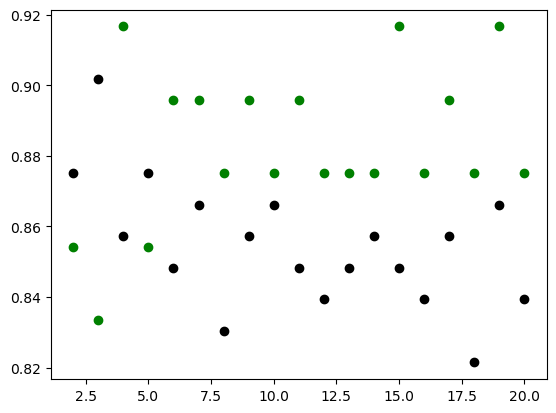

In [33]:
plt.scatter(K, training, color ='k')
plt.scatter(K, test, color ='g')
plt.show()
# For overlapping scatter plots